<a href="https://colab.research.google.com/github/RitvikPrabhu/HemeAI/blob/master/Milestone2_DiseaseDetect/YOLOv8/Disease_detect_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HemeAI: Disease Detection**

###Author: Bhargav Iyer

Below we will clone our repository. The repository will contain the model files, annotated dataset and setup.py which are all necessary to train the model used for the first milestone of the project.  We also import IPython.display clear_output to make the file look better.

In [1]:
from IPython.display import clear_output

In [2]:
!git clone https://github.com/RitvikPrabhu/AutoCBC.git
%cd AutoCBC
!pip install -r requirements.txt
%cd Milestone2_DiseaseDetect/yolov8
clear_output()

The code below will allows us to reset our directory without having to shutdown the entire runtime

In [3]:
# !rm -rf AutoCBC/


Import the necessary files and ensure the hardware is compatible

In [4]:
import ultralytics
from ultralyticsplus import YOLO, render_result

ultralytics.checks()

Ultralytics YOLOv8.0.23 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.2/78.2 GB disk)


Install roboflow to get the annotated images to use for testing, training and validating.  Also getting it in yolov8 friendly text.

In [5]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="k7t7R1s1qjS9eojgbD50")
project = rf.workspace().project("disease-detection-z1mqc")
dataset = project.version(2).download("yolov8")
clear_output()

Moving the folder with images gotten from roboflow into Milestone2 so that it can be worked on as well as moving data.yaml file outside the folder to make he training realize what folder to look for.

In [7]:
import shutil

shutil.move("/content/AutoCBC/Disease-Detection-2", "/content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/Disease-Detection-2")
#shutil.move("/content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/Disease-Detection-3/data.yaml", "/content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/data.yaml")
clear_output()


We will load the necessary pretrained YOLO model and train the model to our dataset

In [9]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
# Use the model

#!yolo task=object-detection mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 optimizer="Adam"
model.train(data="/content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/data.yaml", epochs=300, imgsz=640, task = "detect", optimizer="Adam")  # train the model
# maybe increase to 300 epochs
metrics = model.val()  # evaluate model performance on the validation set
clear_output()

# task=detect, mode=train, model=yolov8m.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.001, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, dfl=1.5, fl_gamma=0.0, label_smoothing=0.0, nbs=64, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.9, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.1, copy_paste=0.1, cfg=None, v5loader=False, save_dir=runs/detect/train

We locate the model with the most favorable weights and store in the home directory and name it "best.pt". We will use these weights in the model and edit some hyperparameters of the model. We will use this to detect objects using bounding boxes

Ultralytics YOLOv8.0.23 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/Disease-Detection-2/test/images/MMY_859004_jpg.rf.f921e74026c2ade02f430f8925588040.jpg: 640x640 1 myelocyte, 7.7ms
Speed: 0.6ms pre-process, 7.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


tensor([[197.00000, 213.00000, 446.00000, 435.00000,   0.95843,   7.00000]], device='cuda:0')


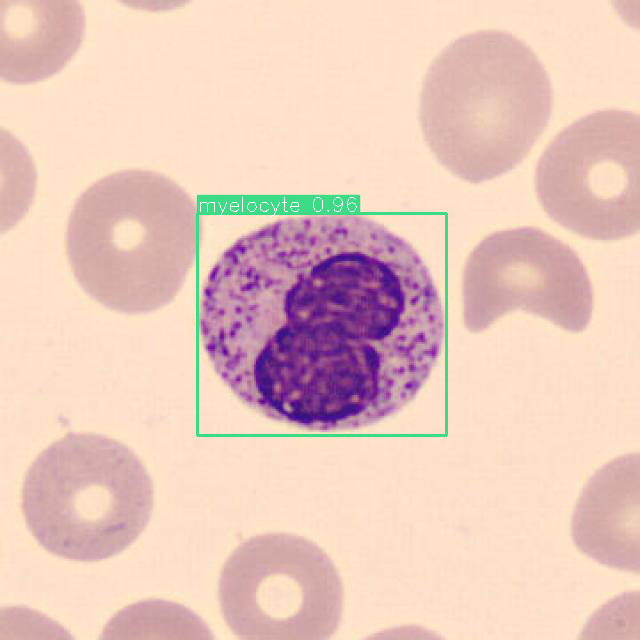

In [16]:
import os
model = YOLO('/content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/runs/detect/train3/weights/best.pt')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# observe results
image_pth = "/content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/Disease-Detection-2/test/images"
image = os.listdir(image_pth)[0]
image_pth_full = image_pth + "/" + image
results = model.predict(image_pth_full)

print(results[0].boxes)
render = render_result(model=model, image=image_pth_full, result=results[0])
render.show()



We will count the number of objects in each class and find the ratio of cells in each image

In [19]:
results = model.predict(image_pth_full, stream=True)
disease_blood_count = {"neutrophil": 0, "eosinophil": 0, "basophil": 0, "lymphocyte": 0, "monocyte": 0, "myelocyte": 0, "erythroblast": 0, "abnormal_rbc": 0, "band_neutrophil": 0, "segmented_neutrophil": 0}

for r in results:
    for c in r.boxes.cls:
      if model.names[int(c)] in disease_blood_count.keys():
         disease_blood_count[model.names[int(c)]] += 1

print(disease_blood_count)
results = [disease_blood_count['neutrophil'] / sum(disease_blood_count.values()), disease_blood_count['eosinophil'] / sum(disease_blood_count.values()), disease_blood_count['basophil'] / sum(disease_blood_count.values()), disease_blood_count['lymphocyte'] / sum(disease_blood_count.values()), disease_blood_count['monocyte'] / sum(disease_blood_count.values()), disease_blood_count['myelocyte'] / sum(disease_blood_count.values()), disease_blood_count['erythroblast'] / sum(disease_blood_count.values()), disease_blood_count['abnormal_rbc'] / sum(disease_blood_count.values()), disease_blood_count['band_neutrophil'] / sum(disease_blood_count.values()), disease_blood_count['segmented_neutrophil'] / sum(disease_blood_count.values())]

print(results)

image 1/1 /content/AutoCBC/Milestone2_DiseaseDetect/YOLOv8/Disease-Detection-2/test/images/MMY_859004_jpg.rf.f921e74026c2ade02f430f8925588040.jpg: 640x640 1 myelocyte, 7.6ms
Speed: 0.7ms pre-process, 7.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


{'neutrophil': 0, 'eosinophil': 0, 'basophil': 0, 'lymphocyte': 0, 'monocyte': 0, 'myelocyte': 1, 'erythroblast': 0, 'abnormal_rbc': 0, 'band_neutrophil': 0, 'segmented_neutrophil': 0}
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
